In [19]:
!pip install pandas numpy matplotlib seaborn scikit-learn joblib flask flask-cors gunicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 5.3 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 7.0 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13/13 [flask-cors]3 [flask-cors]n]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('loan_approval_dataset.csv')
display(df.head())

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

<Figure size 1200x1000 with 0 Axes>

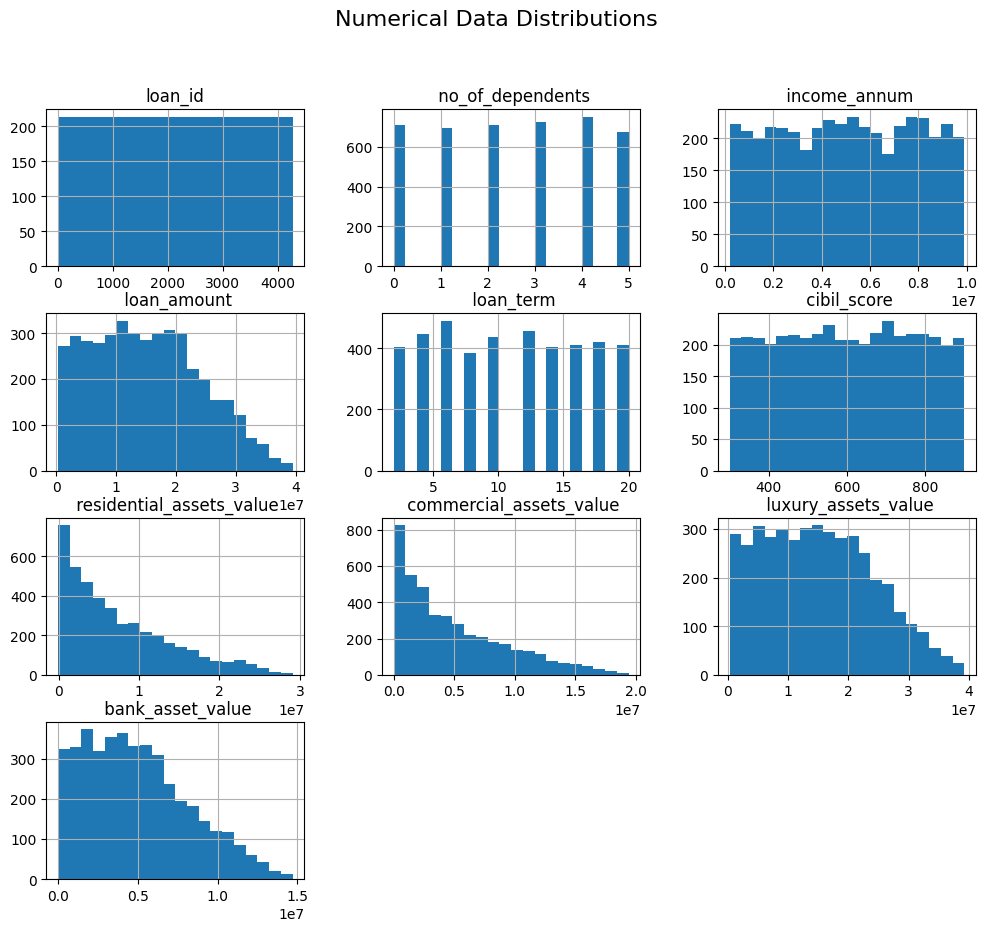

In [9]:
#Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

#Plot histogram for each numerical column
plt.figure(figsize=(12, 10))
df[numeric_cols].hist(bins=20, figsize=(12, 10))
plt.suptitle("Numerical Data Distributions", fontsize=16)
plt.show()

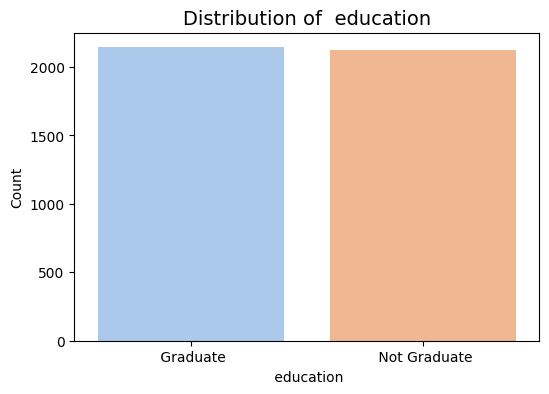

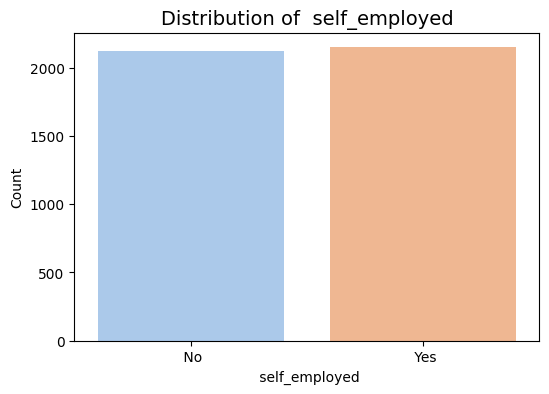

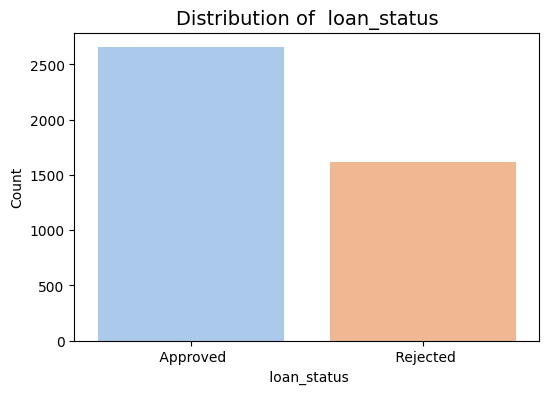

In [10]:
#Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

#Plot count plots for each categorical column
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [11]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [12]:
#Select asset columns
asset_cols = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']


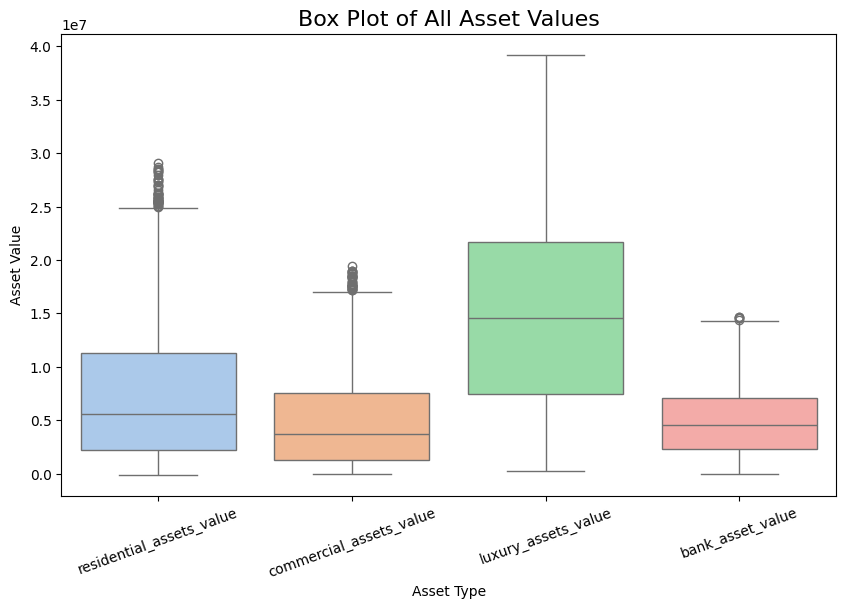

In [13]:
# Clean up column names by removing leading spaces
df.columns = df.columns.str.lstrip()

#Create a boxplot for all assets
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[asset_cols], palette="pastel")
plt.title("Box Plot of All Asset Values", fontsize=16)
plt.ylabel("Asset Value")
plt.xlabel("Asset Type")
plt.xticks(rotation=20)
plt.show()

Check For Outliers


In [14]:
#Check for outliers
#Checking fpr negative values in numeric columns
numeric_columns=df.select_dtypes(include=['number']).columns
anomalies={col:df[df[col]<0][col].count()for col in numeric_columns}
anomalies


{'loan_id': np.int64(0),
 'no_of_dependents': np.int64(0),
 'income_annum': np.int64(0),
 'loan_amount': np.int64(0),
 'loan_term': np.int64(0),
 'cibil_score': np.int64(0),
 'residential_assets_value': np.int64(28),
 'commercial_assets_value': np.int64(0),
 'luxury_assets_value': np.int64(0),
 'bank_asset_value': np.int64(0)}

In [15]:
#Remove rows containing negative values in numeric columns and update df
df=df[(df[numeric_columns]>=0).all(axis=1)]
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [16]:
# Create a copy of df as df1
df1 = df.copy()
# Creating new features
# 1. Total asset value
df1['total_assets_value'] = (df1['residential_assets_value'] + df1['commercial_assets_value'] + df1['luxury_assets_value'] + df1['bank_asset_value'])
# Total asset value
# 3. Debt to Income Ratio
# Assume we use Loan_amount as the total debt requested
df1['debt_to_income_ratio'] = df1['loan_amount'] / df1['income_annum']
# 4. Calculating Loan to value Ratio
df1["loan_to_value_ratio"] = df1["loan_amount"] / df1['total_assets_value'] # using the previously created total_assets_value
# Liability ratio
df1['dependents_to_income_ratio'] = df1['no_of_dependents'] / df1['income_annum']

# Define a function to categorize CIBIL scores
def categorize_cibil(score):
    if score < 550:
        return "Very Poor"
    elif 550 <= score <= 649:
        return "Poor"
    elif 650 <= score <= 699:
        return "Fair"
    elif 700 <= score <= 749:
        return "Good"
    else:
        return "Excellent"

# Apply the function to create a new column
df1['cibil_category'] = df1['cibil_score'].apply(categorize_cibil)

In [17]:
#Removing unncessarycolumns
df1.drop(['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'],axis=1,inplace=True)
df1

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets_value,debt_to_income_ratio,loan_to_value_ratio,dependents_to_income_ratio,cibil_category
0,1,2,Graduate,No,9600000,29900000,12,778,Approved,50700000,3.114583,0.589744,2.083333e-07,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000,2.975610,0.717647,0.000000e+00,Very Poor
2,3,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000,3.263736,0.514731,3.296703e-07,Very Poor
3,4,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000,3.743902,0.582543,3.658537e-07,Very Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000,2.469388,0.440000,5.102041e-07,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,Rejected,7400000,2.300000,0.310811,5.000000e-06,Very Poor
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,20000000,3.424242,0.565000,0.000000e+00,Poor
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,Rejected,39000000,3.676923,0.612821,3.076923e-07,Very Poor
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,Approved,28800000,3.121951,0.444444,2.439024e-07,Excellent


In [18]:
df1.columns = df1.columns.str.strip()

# Columns to clean
columns_to_clean = ['education', 'self_employed', 'loan_status']

#Loop through each column and clean values
for col in columns_to_clean:
    # Clean values → remove spaces + make first letter uppercase
    df1[col] = df1[col].astype(str).str.strip().str.title()

df1['education'] = df1['education'].replace({'Graduate': 1,'Not Graduate': 0})
df1['self_employed'] = df1['self_employed'].replace({'No': 0,'Yes': 1})
df1['loan_status'] = df1['loan_status'].replace({'Approved': 1,'Rejected': 0})
df1['cibil_category'] = df1['cibil_category'].replace({'Very Poor': 0,'Poor': 1,'Fair': 2,'Good': 3,'Excellent': 4})
df1


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets_value,debt_to_income_ratio,loan_to_value_ratio,dependents_to_income_ratio,cibil_category
0,1,2,1,0,9600000,29900000,12,778,1,50700000,3.114583,0.589744,2.083333e-07,4
1,2,0,0,1,4100000,12200000,8,417,0,17000000,2.975610,0.717647,0.000000e+00,0
2,3,3,1,0,9100000,29700000,20,506,0,57700000,3.263736,0.514731,3.296703e-07,0
3,4,3,1,0,8200000,30700000,8,467,0,52700000,3.743902,0.582543,3.658537e-07,0
4,5,5,0,1,9800000,24200000,20,382,0,55000000,2.469388,0.440000,5.102041e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,0,7400000,2.300000,0.310811,5.000000e-06,0
4265,4266,0,0,1,3300000,11300000,20,559,1,20000000,3.424242,0.565000,0.000000e+00,1
4266,4267,2,0,0,6500000,23900000,18,457,0,39000000,3.676923,0.612821,3.076923e-07,0
4267,4268,1,0,0,4100000,12800000,8,780,1,28800000,3.121951,0.444444,2.439024e-07,4
